In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def _plt(img, cmap,title, fsize,p):
    if p == 0:
        plt.title(title, fontsize=fsize)
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(img, cmap=cmap)


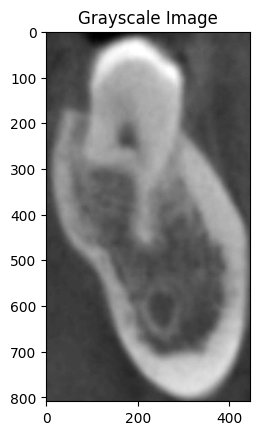

In [4]:
# Read the image in grayscale
image = cv2.imread('M3_Dataset/m3_1_1.jpg', cv2.IMREAD_GRAYSCALE)
_plt(image, 'gray', 'Grayscale Image', 12, 0)

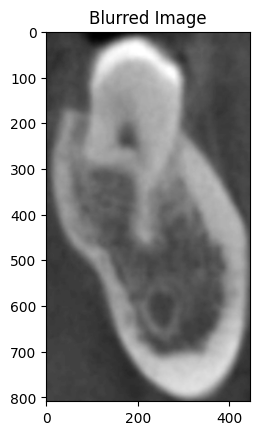

In [5]:
# Noise Removal (Gaussian Blur)
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
_plt(blurred_image, 'gray', 'Blurred Image', 12, 0)


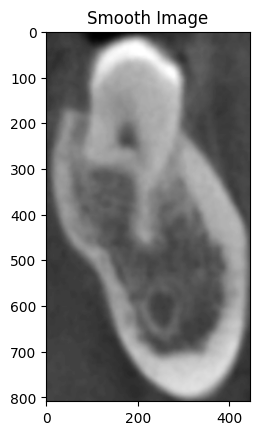

In [6]:
# Smoothen Image (Median Blur)
smooth_image = cv2.medianBlur(blurred_image, 5)
_plt(smooth_image, 'gray', 'Smooth Image', 12, 0)


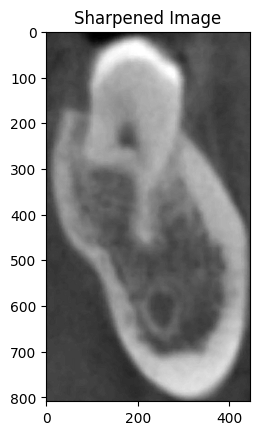

In [7]:
# Sharpen Image
kernel = np.array([[-1, -1, -1],
                  [-1, 9, -1],
                  [-1, -1, -1]])
sharpened_image = cv2.filter2D(smooth_image, -1, kernel)
_plt(sharpened_image, 'gray', 'Sharpened Image', 12, 0)


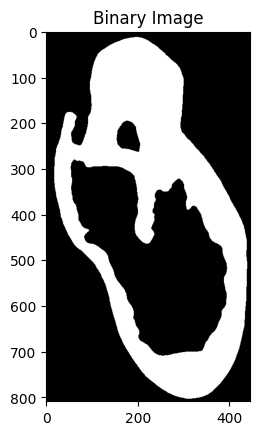

In [8]:
# Binarization (Simple Thresholding)
_, binary_image = cv2.threshold(smooth_image, 127, 255, cv2.THRESH_BINARY)
_plt(binary_image, 'gray', 'Binary Image', 12, 0)

Region of Interest

Use ms paint on the image you will use, then you manually mark the ROI. 
Then use python code to input the ROI

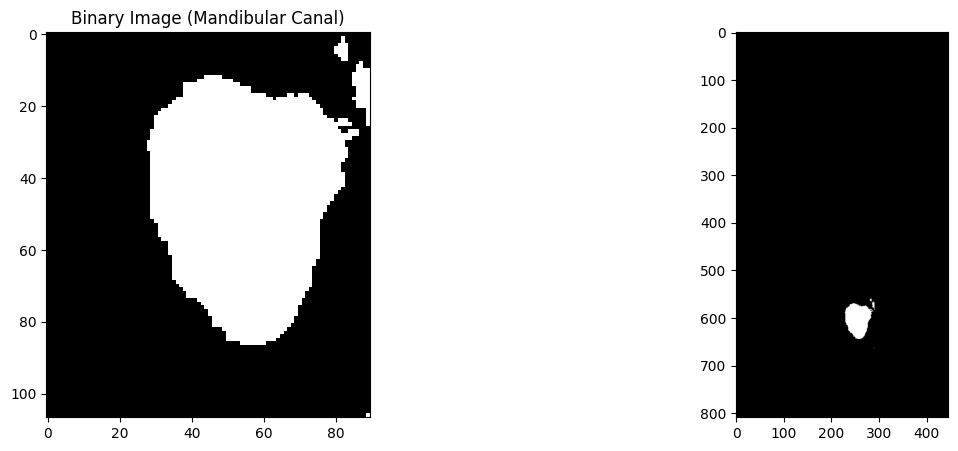

In [9]:
# Define the region of interest (ROI) on the grayscale image
x1, y1, x2, y2 = 200, 558, 290, 665  # Specify the region coordinates

# Create a copy of the grayscale image
roi_image = image.copy()

# Apply a threshold value of 80 within the ROI using binary inverse
threshold_roi = 80  # Set the threshold value to 80 for the ROI
roi = roi_image[y1:y2, x1:x2]
_, binary_inverse_roi = cv2.threshold(roi, threshold_roi, 255, cv2.THRESH_BINARY_INV)
roi_image[y1:y2, x1:x2] = binary_inverse_roi

# Set the rest of the image (outside the ROI) to be completely black
roi_image[:y1, :] = 0
roi_image[y2:, :] = 0
roi_image[:, :x1] = 0
roi_image[:, x2:] = 0

# Display the result
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)
_plt(binary_inverse_roi, 'gray', 'Binary Image (Mandibular Canal)', 12, 0)

ax = fig.add_subplot(122)
_plt(roi_image, 'gray', 'Mandibular Canal Detected (Binary Inverse Threshold)', 12, 1)


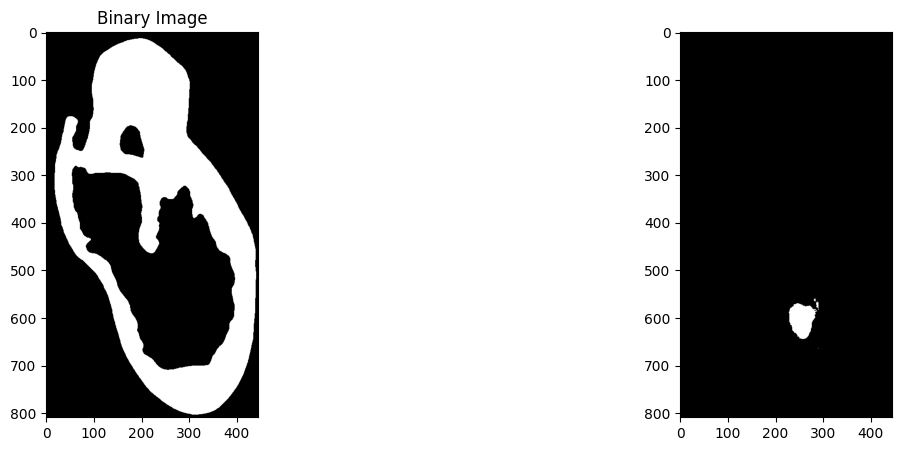

In [10]:
# Display the result
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)
_plt(binary_image, 'gray', 'Binary Image', 12, 0)


ax = fig.add_subplot(122)
_plt(roi_image, 'gray', 'Mandibular Canal Detected (Binary Inverse Threshold)', 12, 1)

****

In [18]:

def detect_mandibular_canal(image_path, x1, y1, x2, y2, threshold_roi=80):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Create a copy of the grayscale image
    roi_image = image.copy()

    # Apply a threshold value within the ROI using binary inverse
    roi = roi_image[y1:y2, x1:x2]
    _, binary_inverse_roi = cv2.threshold(roi, threshold_roi, 255, cv2.THRESH_BINARY_INV)
    roi_image[y1:y2, x1:x2] = binary_inverse_roi

    # Set the rest of the image (outside the ROI) to be completely black
    roi_image[:y1, :] = 0
    roi_image[y2:, :] = 0
    roi_image[:, :x1] = 0
    roi_image[:, x2:] = 0

    # Display the result

    ax = fig.add_subplot(122)
    _plt(roi_image, 'gray', 'Mandibular Canal Detected (Binary Inverse Threshold)', 12, 1)


In [12]:
def binarize_with_threshold(image, threshold_value):
    # Binarization (Simple Thresholding)
    _, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return binary_image


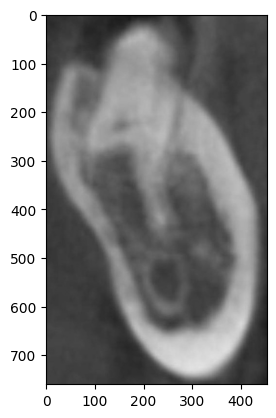

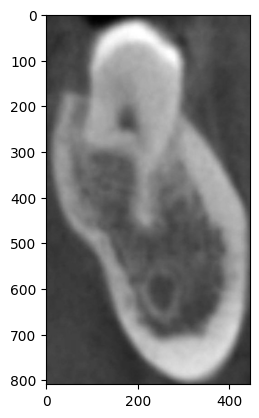

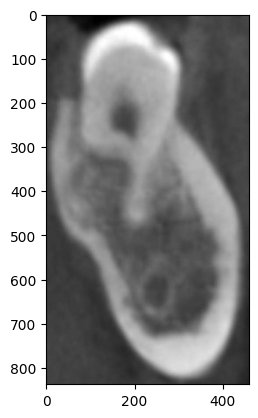

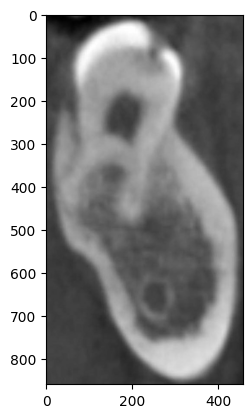

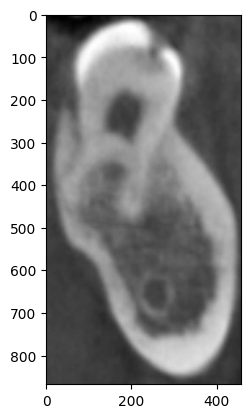

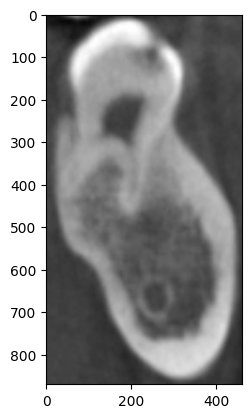

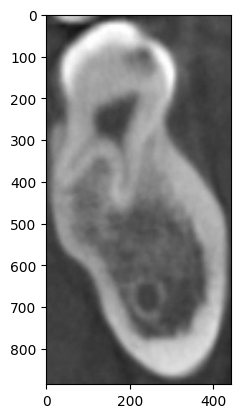

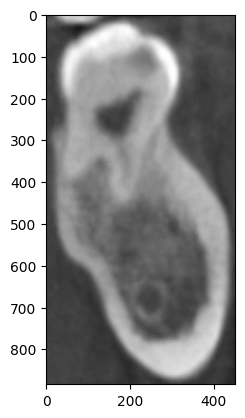

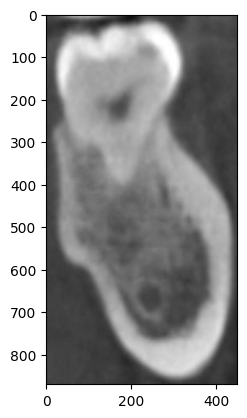

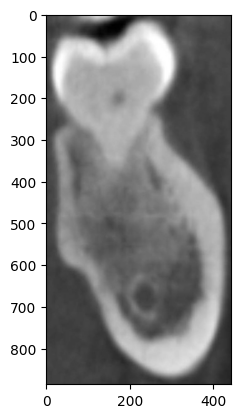

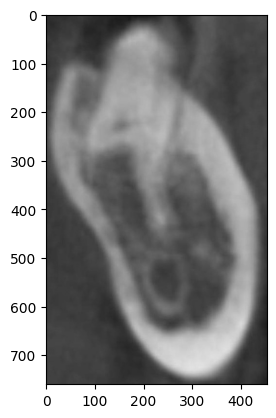

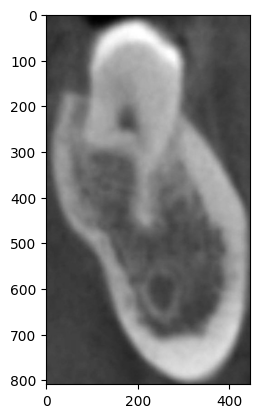

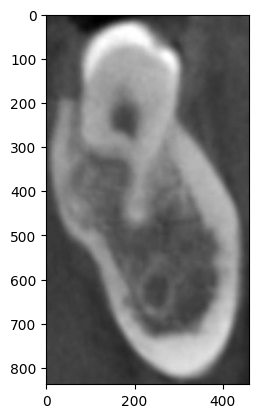

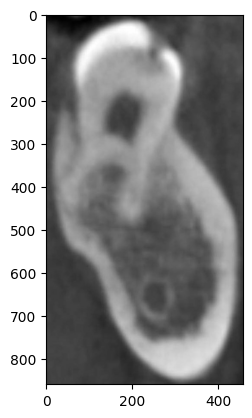

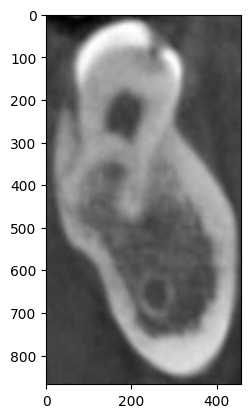

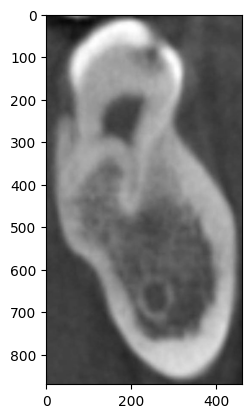

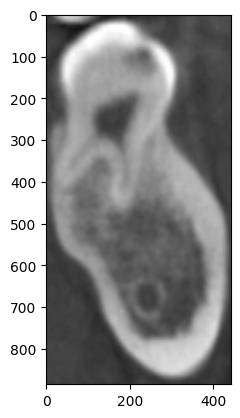

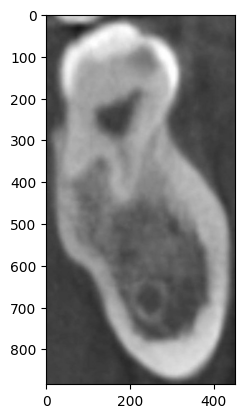

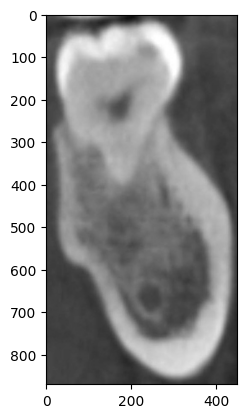

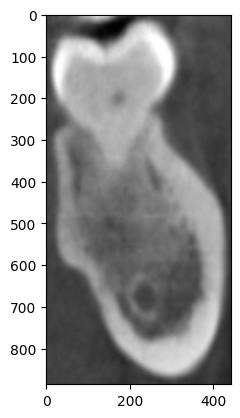

In [13]:
# import the modules
import os
from os import listdir
 
# get the path/directory
folder_dir = "M3_Dataset"
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".jpg")):
        # read the image
        image = plt.imread(os.path.join(folder_dir, images))

        # display the image
        plt.imshow(image)
        plt.show()

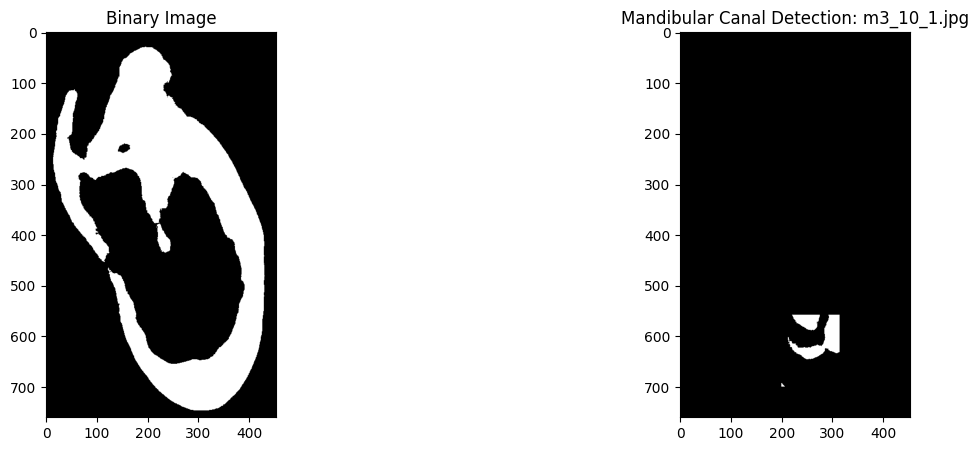

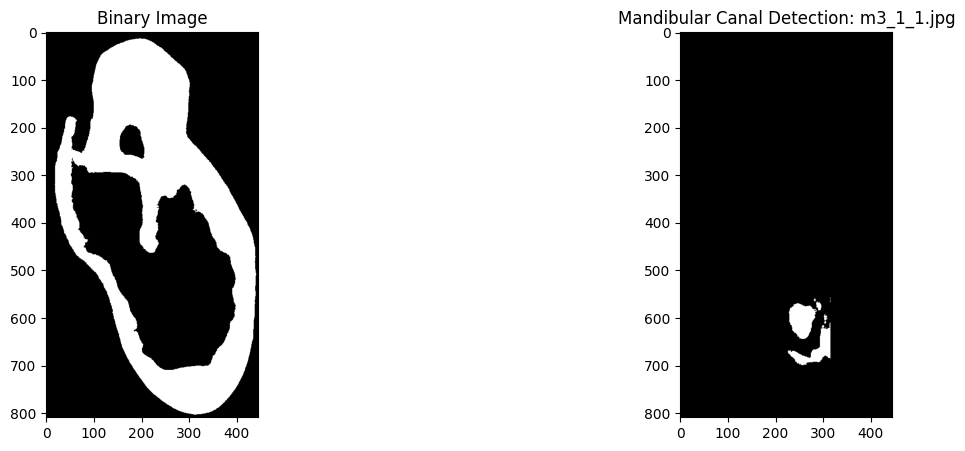

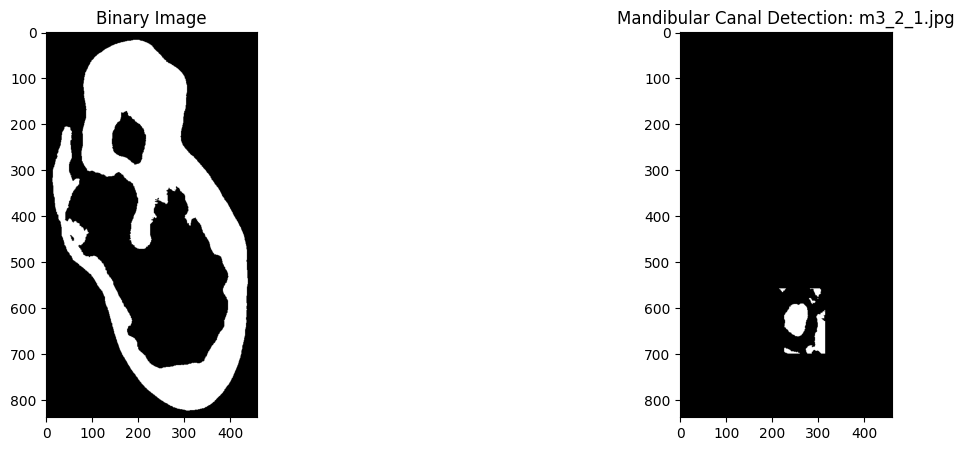

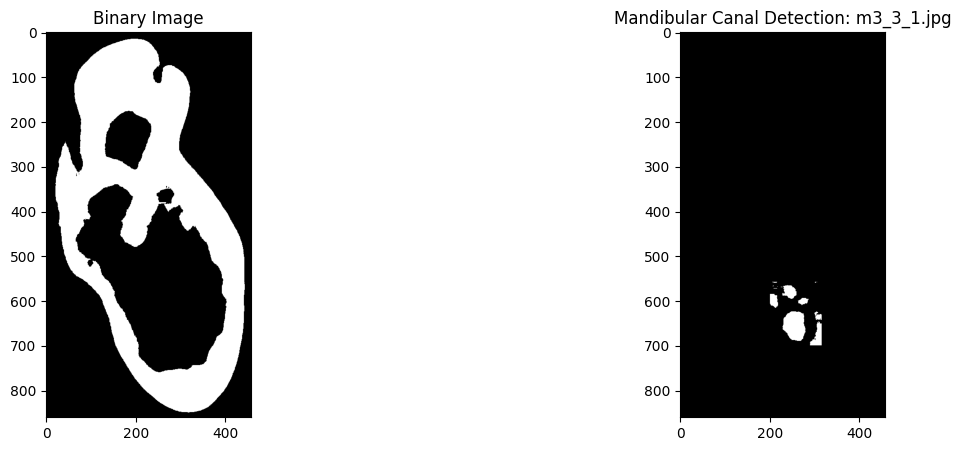

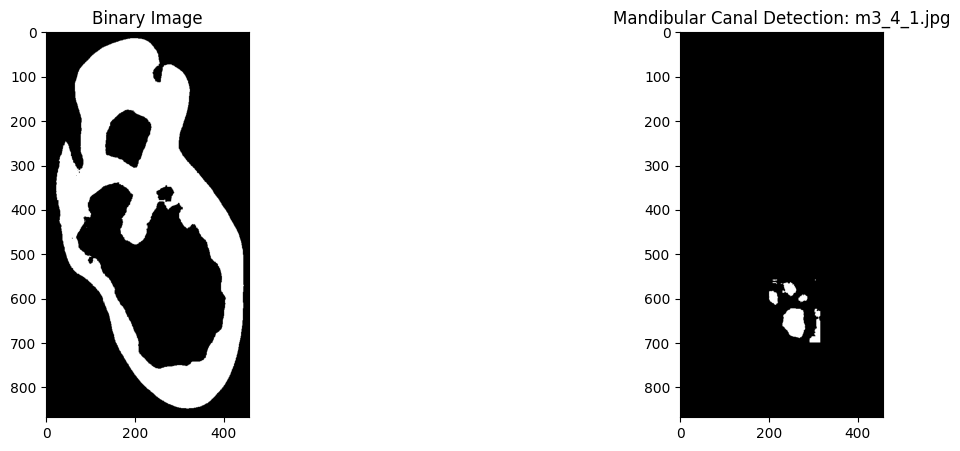

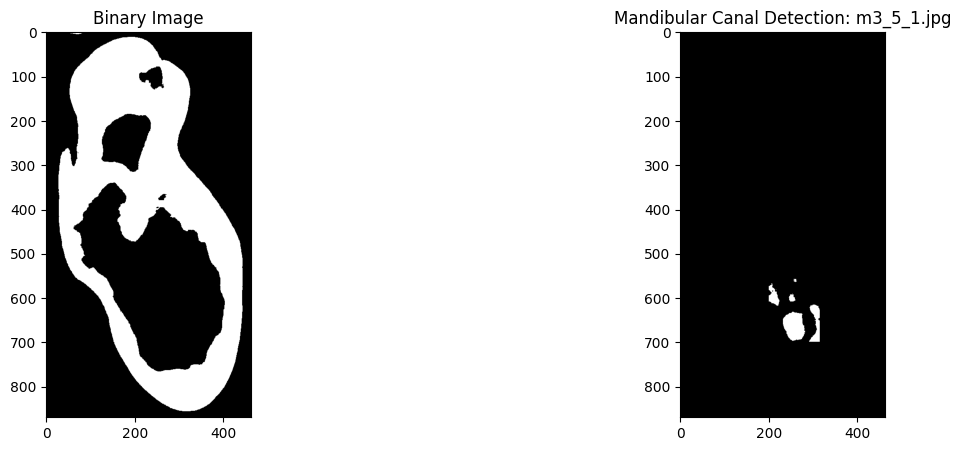

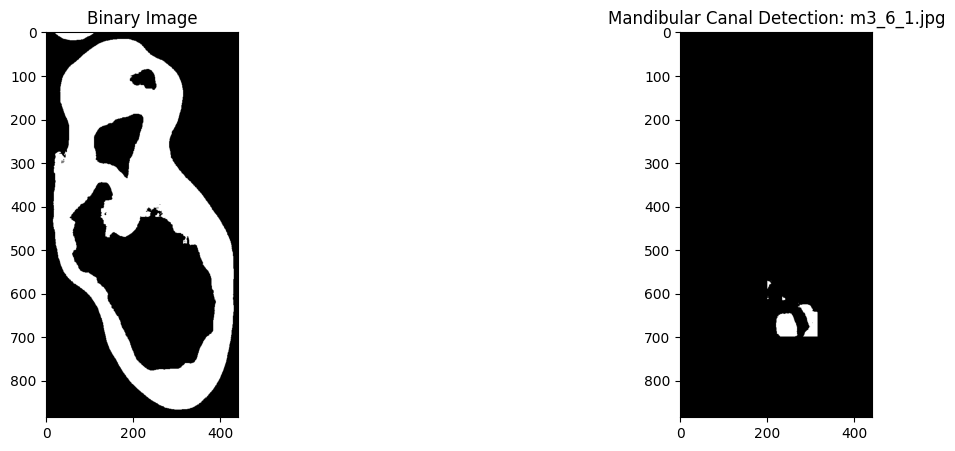

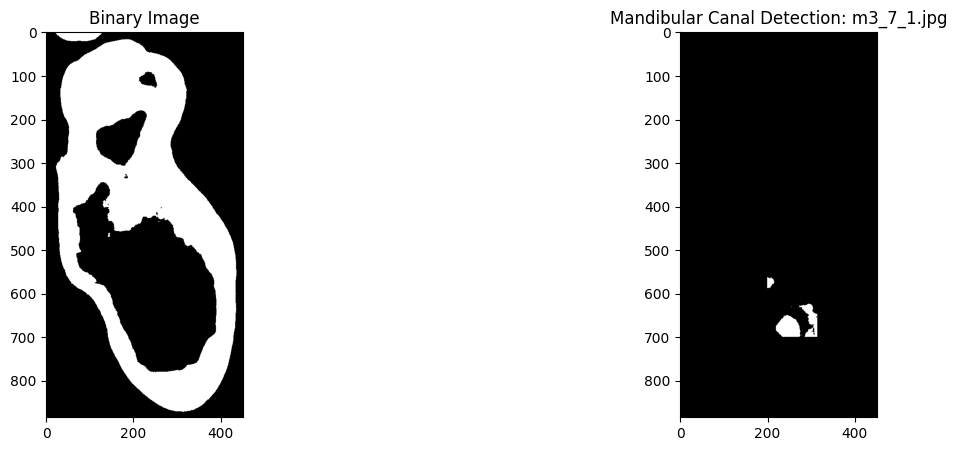

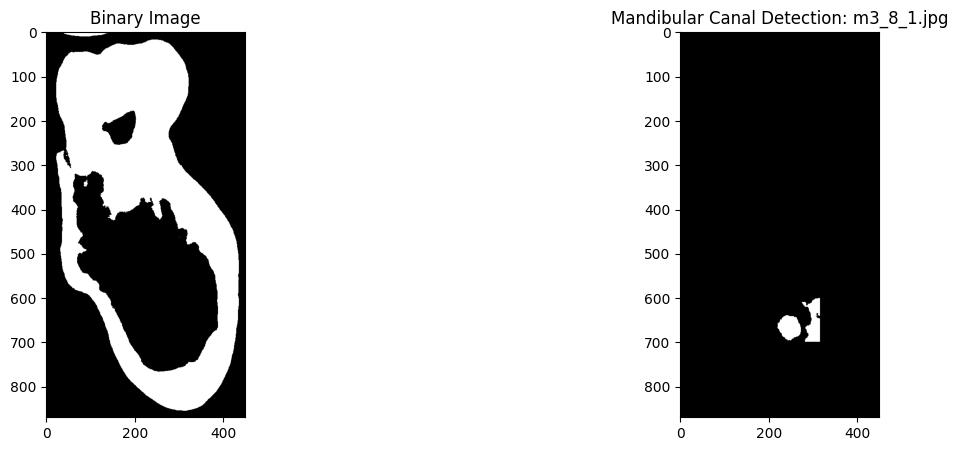

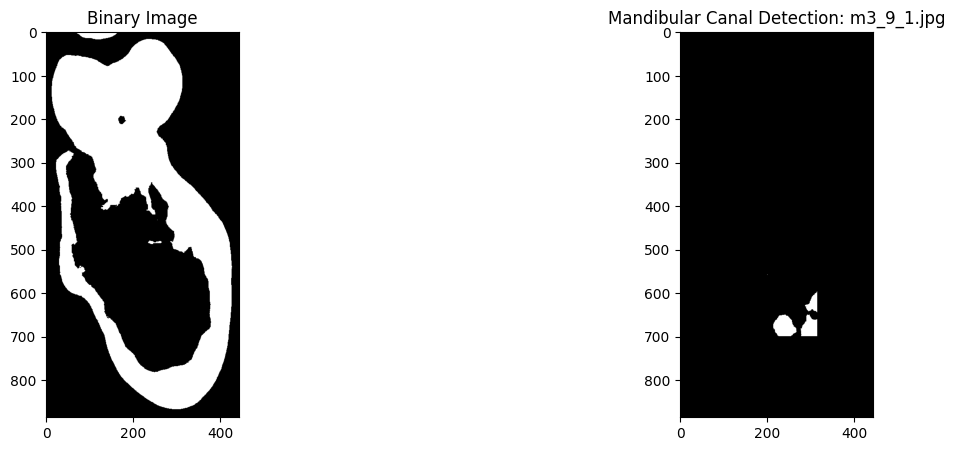

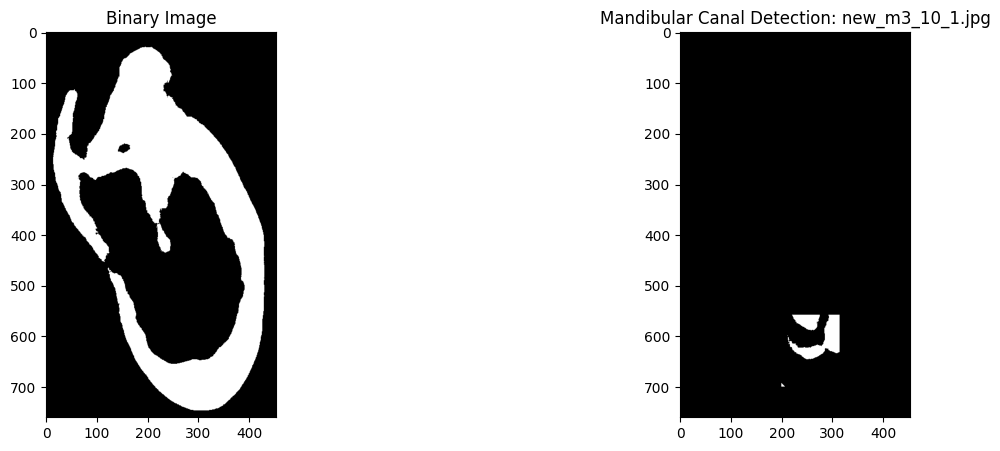

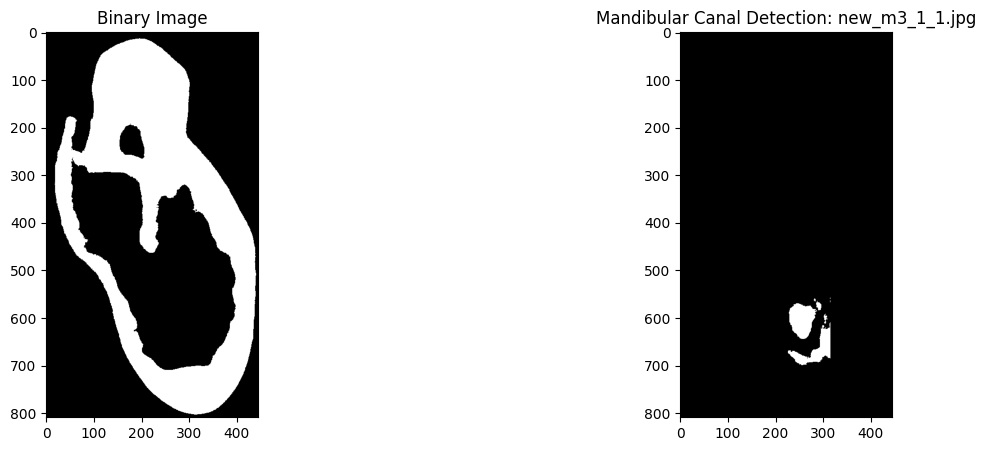

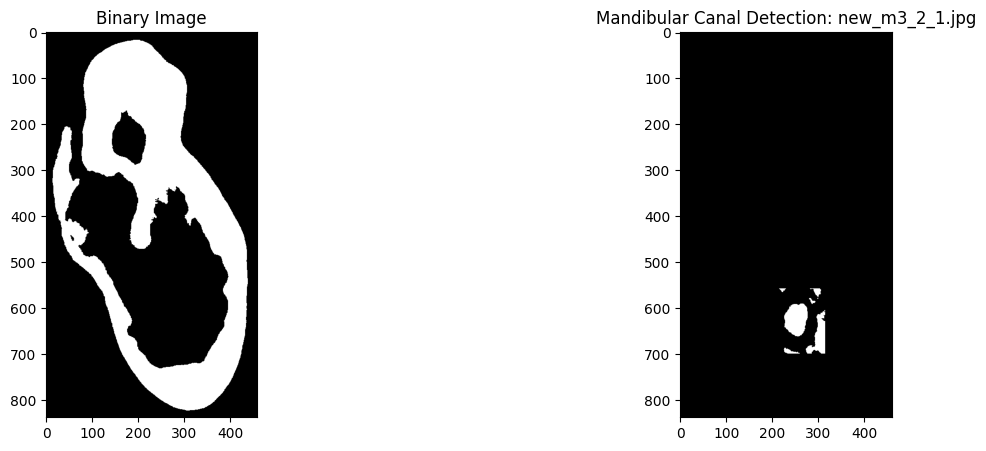

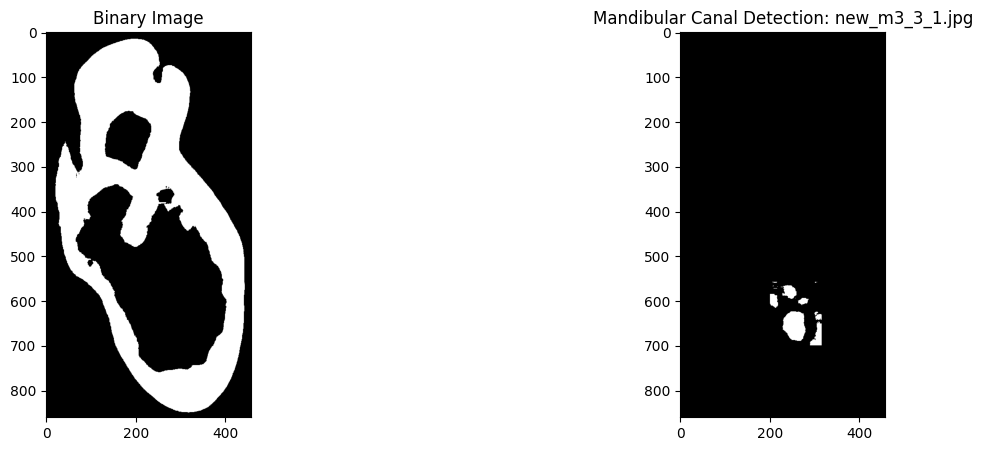

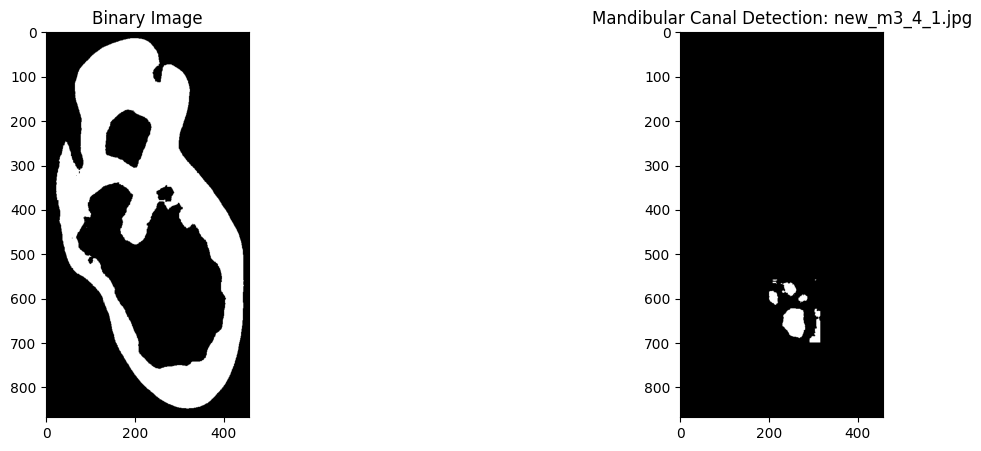

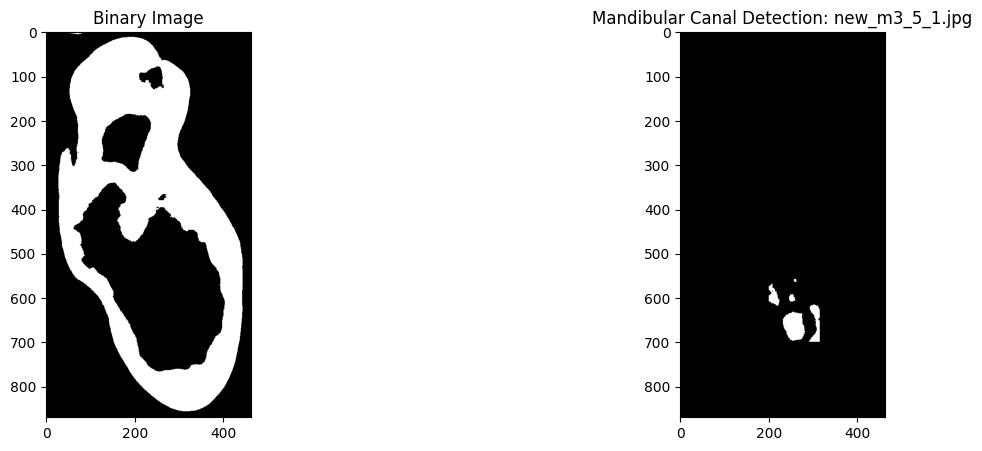

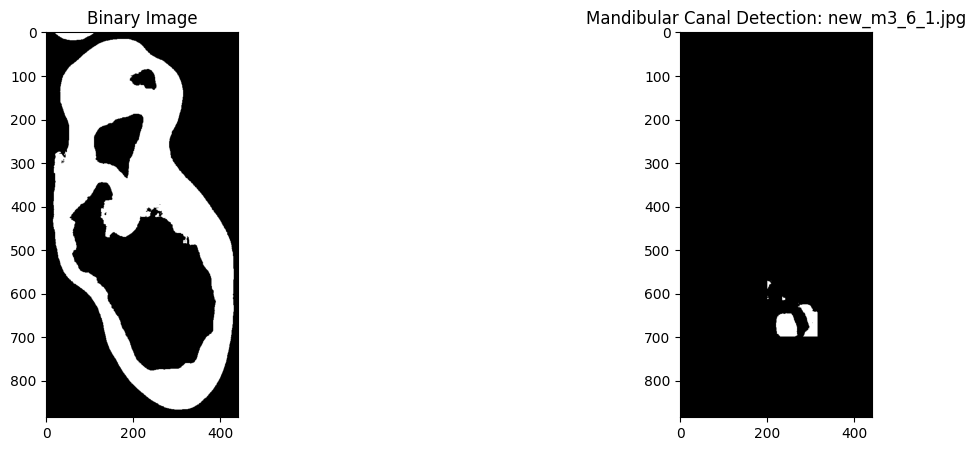

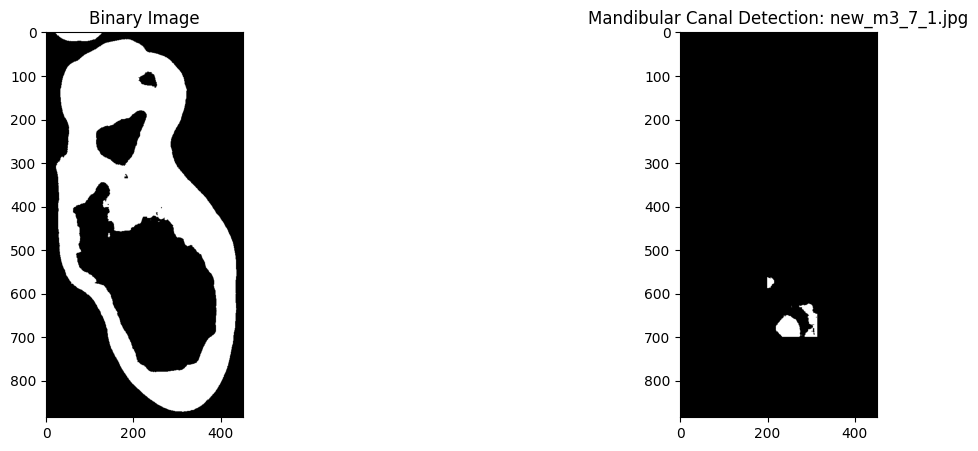

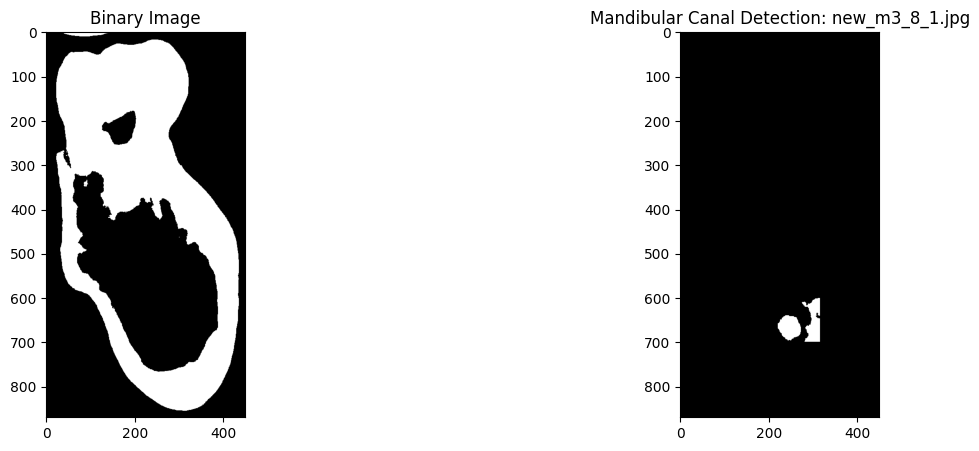

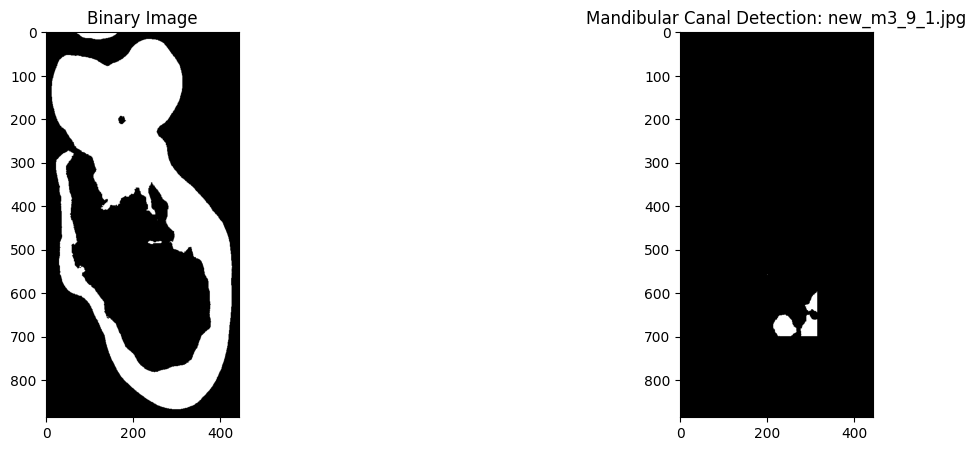

In [14]:
folder_dir = "M3_Dataset"
image_files = [f for f in os.listdir(folder_dir) if f.endswith(".jpg")]

for image_file in image_files:
    image_path = os.path.join(folder_dir, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    binary_image = binarize_with_threshold(image, 130)  # Adjust the threshold value as needed
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(121)
    _plt(binary_image, 'gray', 'Binary Image', 12, 0)

    detect_mandibular_canal(image_path, 200, 558, 315, 700, threshold_roi=80)#725
    plt.title(f'Mandibular Canal Detection: {image_file}', fontsize=12)  # Display the photo name
    plt.show()


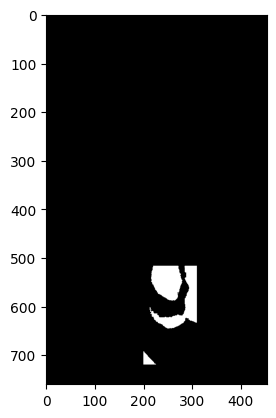

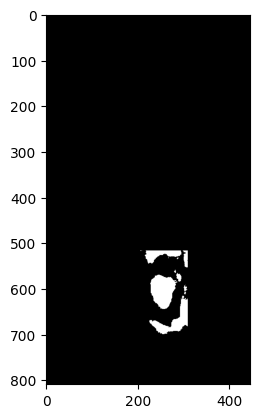

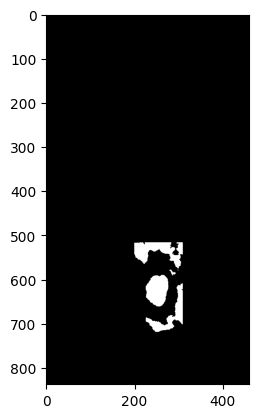

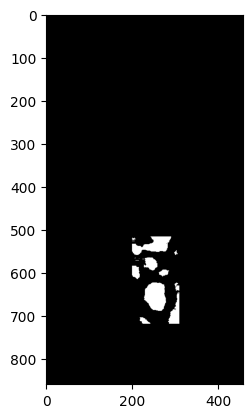

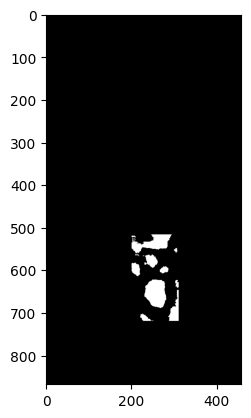

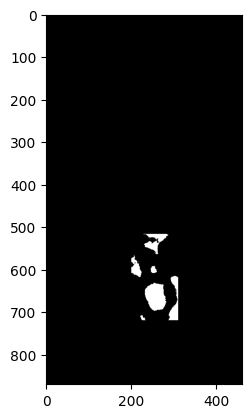

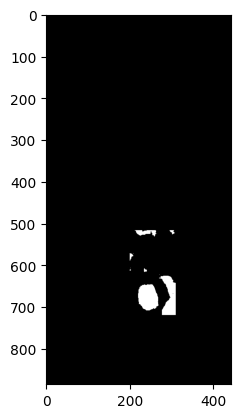

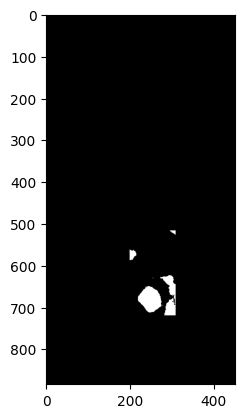

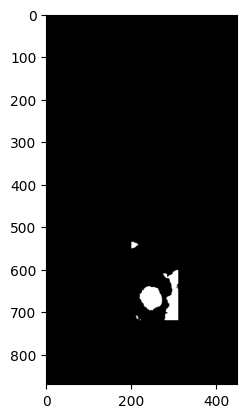

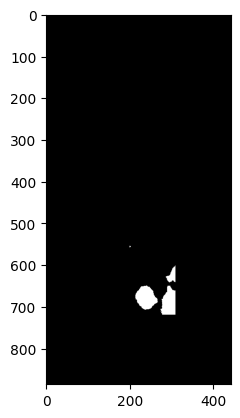

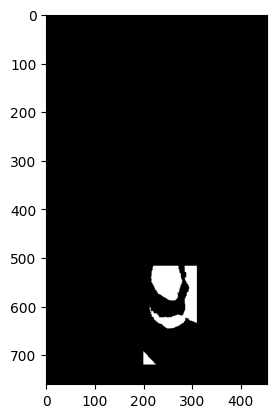

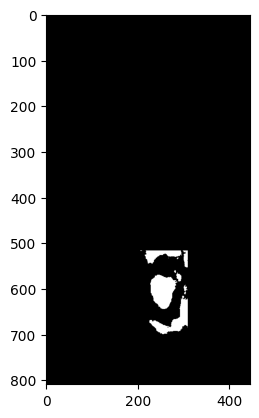

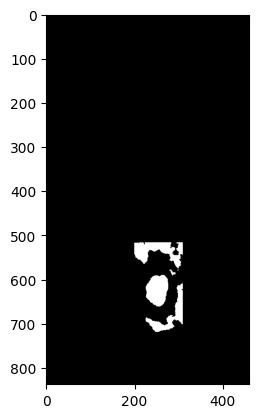

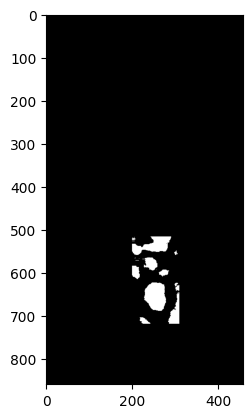

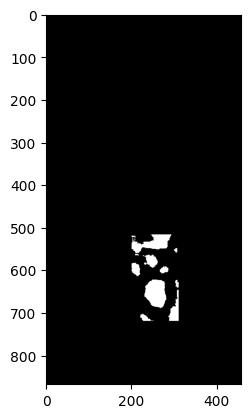

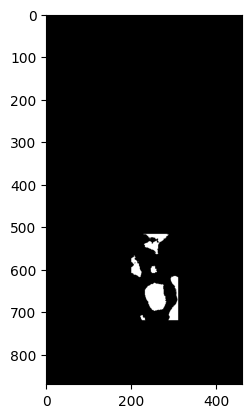

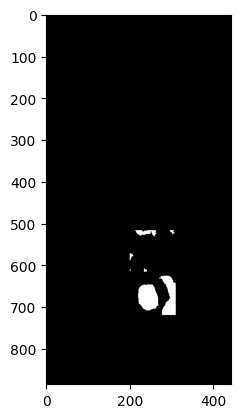

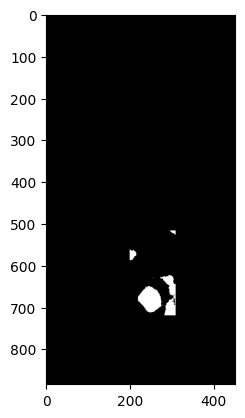

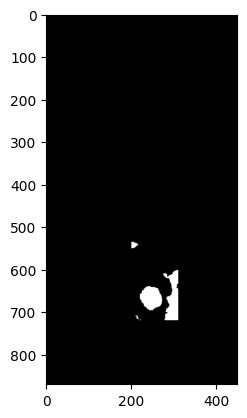

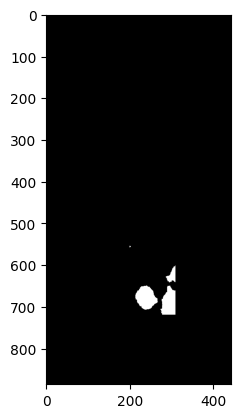

In [15]:

# Path to the image directory
folder_dir = "M3_Dataset"

# Get the list of image files in the directory
image_files = [f for f in os.listdir(folder_dir) if f.endswith(".jpg")]

# Iterate through the image files and apply the detection function
for image_file in image_files:
    image_path = os.path.join(folder_dir, image_file)
    detect_mandibular_canal(image_path, 200, 517, 310, 720, threshold_roi=80)
    plt.show()

****

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


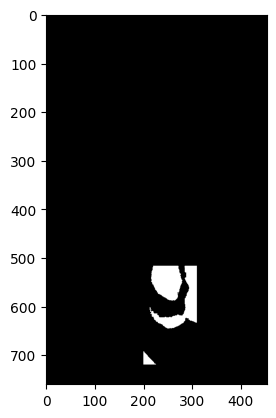

In [21]:
# Path to the image directory
folder_dir = "M3_Dataset"

# Create the "output/MCanal" directory if it doesn't exist
output_dir = "output/MCanal"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Get the list of image files in the directory
image_files = [f for f in os.listdir(folder_dir) if f.endswith(".jpg")]

# Iterate through the image files and apply the detection function
for image_file in image_files:
    image_path = os.path.join(folder_dir, image_file)
    
    # Detect the mandibular canal
    mandibular_canal_image = detect_mandibular_canal(image_path, 200, 517, 310, 720, threshold_roi=80)
    
    # Define the output file path for the new JPG image
    output_image_path = os.path.join(output_dir, f"MC_{image_file}")
    
    # Save the processed image as a new JPG file with the "MC_" prefix
    cv2.imwrite(output_image_path, mandibular_canal_image)
    
    # Save the output from detect_mandibular_canal() as a numpy array
    output_npz_path = os.path.join(output_dir, f"MC_{image_file}.npz")
    np.savez(output_npz_path, mandibular_canal_image)

# Show an example of the detected mandibular canal image
sample_image = mandibular_canal_image  # You can use any of the processed images
plt.imshow(sample_image, cmap='gray')
plt.title('Sample Mandibular Canal Image')
plt.show()